In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [20]:
# 1. Parâmetros das distribuições
media_vermelha = 0
media_azul = 5
desvio_padrao = 1

In [23]:
# 2. Simular dados da distribuição azul
np.random.seed(42)  # para resultados reprodutíveis
num_sequencias = 100
tamanho_sequencia = 3

# 100 sequências de 3 valores da azul
sequencias = np.random.normal(loc=media_azul, scale=desvio_padrao, size=(num_sequencias, tamanho_sequencia))

print(sequencias)

# 3. Calcular a média de cada sequência
medias_sequencias = np.mean(sequencias, axis=1)

# 4. Calcular p-values usando a distribuição vermelha
# A média da amostra sob H0 deve seguir uma normal com:
# média 0 e desvio padrão reduzido (σ/√n)
desvio_padrao_amostral = desvio_padrao / np.sqrt(tamanho_sequencia)

# p-valor: P(observar uma média tão extrema ou mais)
p_values = 1 - norm.cdf(medias_sequencias, loc=media_vermelha, scale=desvio_padrao_amostral)

# 5. Calcular a taxa de falsos negativos (p-valor > 5%)
falsos_negativos = np.sum(p_values > 0.05)
taxa_falsos_negativos = falsos_negativos / num_sequencias

# 6. Mostrar os resultados
print(f"Taxa de falsos negativos: {taxa_falsos_negativos:.2%}")

[[5.49671415 4.8617357  5.64768854]
 [6.52302986 4.76584663 4.76586304]
 [6.57921282 5.76743473 4.53052561]
 [5.54256004 4.53658231 4.53427025]
 [5.24196227 3.08671976 3.27508217]
 [4.43771247 3.98716888 5.31424733]
 [4.09197592 3.5876963  6.46564877]
 [4.7742237  5.0675282  3.57525181]
 [4.45561728 5.11092259 3.84900642]
 [5.37569802 4.39936131 4.70830625]
 [4.39829339 6.85227818 4.98650278]
 [3.94228907 5.82254491 3.77915635]
 [5.2088636  3.04032988 3.67181395]
 [5.19686124 5.73846658 5.17136828]
 [4.88435172 4.6988963  3.52147801]
 [4.28015579 4.53936123 6.05712223]
 [5.34361829 3.23695984 5.32408397]
 [4.61491772 4.323078   5.61167629]
 [6.03099952 5.93128012 4.16078248]
 [4.69078762 5.33126343 5.97554513]
 [4.52082576 4.81434102 3.89366503]
 [3.80379338 5.81252582 6.35624003]
 [4.92798988 6.0035329  5.36163603]
 [4.35488025 5.36139561 6.53803657]
 [4.96417396 6.56464366 2.3802549 ]
 [5.8219025  5.08704707 4.70099265]
 [5.09176078 3.01243109 4.78032811]
 [5.35711257 6.47789404 4.48

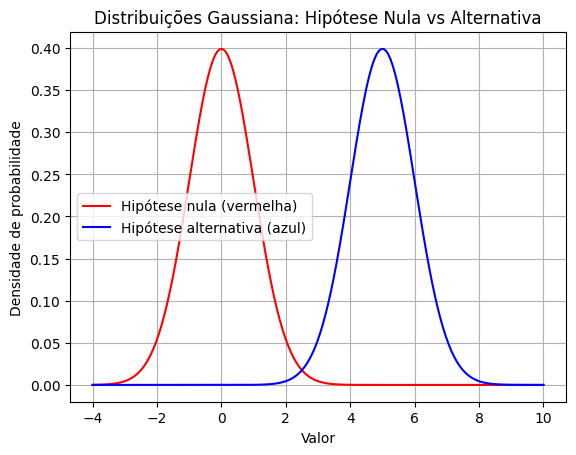

In [24]:
# 7. Plotar as duas distribuições para ilustrar
x = np.linspace(-4, 10, 500)
plt.plot(x, norm.pdf(x, loc=media_vermelha, scale=desvio_padrao), 'r-', label='Hipótese nula (vermelha)')
plt.plot(x, norm.pdf(x, loc=media_azul, scale=desvio_padrao), 'b-', label='Hipótese alternativa (azul)')
#plt.axvline(x=medias_sequencias.mean(), color='purple', linestyle='--', label='Média das sequências azuis')
plt.legend()
plt.title('Distribuições Gaussiana: Hipótese Nula vs Alternativa')
plt.xlabel('Valor')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.show()


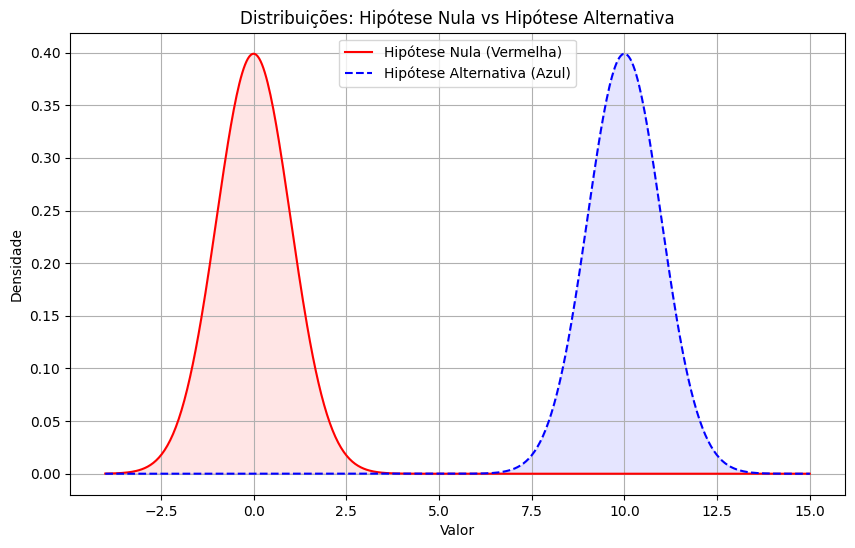

Exemplos de sequências sorteadas da distribuição azul (alternativa):
Sequência 1: [10.49671415  9.8617357  10.64768854] -> Média: 10.34
Sequência 2: [11.52302986  9.76584663  9.76586304] -> Média: 10.35
Sequência 3: [11.57921282 10.76743473  9.53052561] -> Média: 10.63
Sequência 4: [10.54256004  9.53658231  9.53427025] -> Média: 9.87
Sequência 5: [10.24196227  8.08671976  8.27508217] -> Média: 8.87

Exemplo de cálculo de p-valor para a primeira sequência:
Média da sequência: 10.34
P-valor calculado: 0.00000


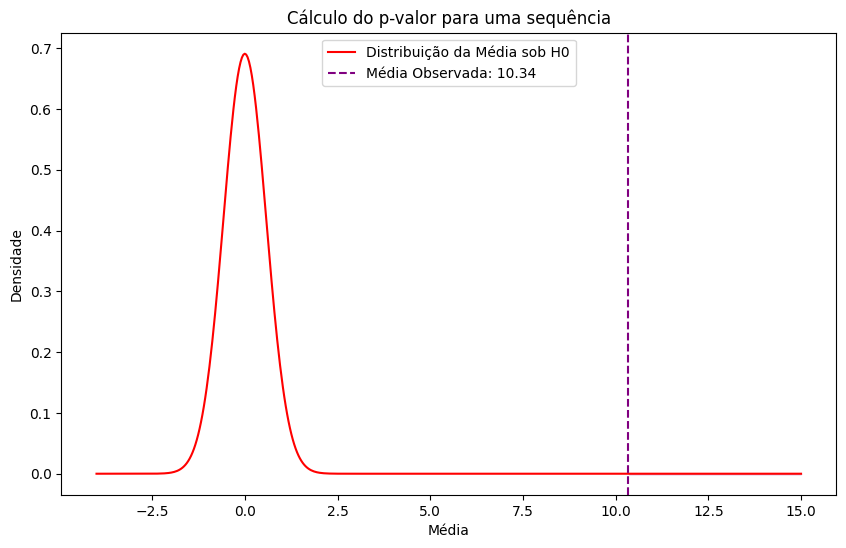


Taxa de falsos negativos: 0.00%


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Parâmetros
media_vermelha = 0
media_azul = 10
desvio_padrao = 1
tamanho_sequencia = 3
num_sequencias = 100

np.random.seed(42)  # reprodutibilidade

# 2. Simular dados da distribuição azul
sequencias = np.random.normal(loc=media_azul, scale=desvio_padrao, size=(num_sequencias, tamanho_sequencia))
medias_sequencias = np.mean(sequencias, axis=1)

# 3. Mostrar as duas distribuições
x = np.linspace(-4, 15, 500)
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x, loc=media_vermelha, scale=desvio_padrao), 'r-', label='Hipótese Nula (Vermelha)')
plt.plot(x, norm.pdf(x, loc=media_azul, scale=desvio_padrao), 'b--', label='Hipótese Alternativa (Azul)')
plt.fill_between(x, 0, norm.pdf(x, loc=media_vermelha, scale=desvio_padrao), color='red', alpha=0.1)
plt.fill_between(x, 0, norm.pdf(x, loc=media_azul, scale=desvio_padrao), color='blue', alpha=0.1)
plt.title('Distribuições: Hipótese Nula vs Hipótese Alternativa')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

# 4. Mostrar algumas sequências sorteadas
print("Exemplos de sequências sorteadas da distribuição azul (alternativa):")
for i in range(5):  # mostrar só 5 exemplos
    print(f"Sequência {i+1}: {sequencias[i]} -> Média: {medias_sequencias[i]:.2f}")

# 5. Cálculo dos p-values
desvio_padrao_amostral = desvio_padrao / np.sqrt(tamanho_sequencia)
p_values = 1 - norm.cdf(medias_sequencias, loc=media_vermelha, scale=desvio_padrao_amostral)

# Mostrar como o p-value é calculado para 1 exemplo:
exemplo_idx = 0
exemplo_media = medias_sequencias[exemplo_idx]
exemplo_pvalue = p_values[exemplo_idx]

print(f"\nExemplo de cálculo de p-valor para a primeira sequência:")
print(f"Média da sequência: {exemplo_media:.2f}")
print(f"P-valor calculado: {exemplo_pvalue:.5f}")

# Desenhar visualmente
plt.figure(figsize=(10,6))
plt.plot(x, norm.pdf(x, loc=media_vermelha, scale=desvio_padrao_amostral), 'r-', label='Distribuição da Média sob H0')
plt.axvline(exemplo_media, color='purple', linestyle='--', label=f'Média Observada: {exemplo_media:.2f}')
plt.fill_between(x[x > exemplo_media], 0, norm.pdf(x[x > exemplo_media], loc=media_vermelha, scale=desvio_padrao_amostral), color='purple', alpha=0.3)
plt.title('Cálculo do p-valor para uma sequência')
plt.xlabel('Média')
plt.ylabel('Densidade')
plt.legend()
#plt.grid(True)
plt.show()

# 6. Calcular a taxa de falsos negativos
falsos_negativos = np.sum(p_values > 0.05)
taxa_falsos_negativos = falsos_negativos / num_sequencias

print(f"\nTaxa de falsos negativos: {taxa_falsos_negativos:.2%}")
